<a href="https://colab.research.google.com/github/juli-ter/Project_SAS/blob/master/5_MarketBasket.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd 

from matplotlib import pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules


In [4]:
path = "/content/drive/My Drive/Optimisation/"
df = pd.read_csv(path+'labeled_data.csv')
data = pd.DataFrame(df)

In [5]:
data.head()

,Unnamed: 0,Дата,ДатаДоставки,НомерЗаказаНаСайте,НовыйСтатус,СуммаЗаказаНаСайте,СуммаДокумента,МетодДоставки,ФормаОплаты,Регион,Группа2,Группа3,Группа4,Тип,Номенклатура,ТипТовара,Отменено,Количество,Цена,Revenue,ЦенаЗакупки,МесяцДатыЗаказа,ГодДатыЗаказа,Статус,Гео,Marge,СуммаУслуг,СуммаДоставки,НомерСтроки,КоличествоПроданоКлиенту,ДатаЗаказаНаСайте,Телефон_new,ЭлектроннаяПочта_new,Клиент,ID_SKU,ГородМагазина,labels
0,0,01.03.2017 12:22,15.03.2017 0:00,3999117_TR,Доставлен,4819,3 759,Магазины,Безналичная,Челябинск,"ТЕКСТИЛЬ, ТРИКОТАЖ",ОДЕЖДА ДЛЯ НОВОРОЖДЕННЫХ (0-2 лет),боди,ОДЕЖДА,"GAMEX, БОДИ кор. рук. Roza, (бел/сер), р. 86, ...",МГТ,Нет,1,379.0,379.0,"209,8",3,2 017,Доставлен,Регионы,169.20,0,0,3,1,01.03.2017 0:00,55575453-56535648535679,107117_ku16@list.ru,Гость,IDL00028974351,0,1
1,1,01.03.2017 12:31,17.03.2017 0:00,3999122_TR,Доставлен,3325,3 325,Магазины,Безналичная,Нижневартовск,ИГРУШКИ,ИГРУШКИ ДЛЯ ДЕВОЧЕК,имитационные игрушки для девочек,ИГРУШКИ,"ИГРУША, ХОЛОДИЛЬНИК (на бат), (29,5*19*45,5 см)",МГТ,Нет,1,3325.0,3325.0,1 149,3,2 017,Доставлен,Регионы,2176.00,0,0,1,1,01.03.2017 0:00,55574950-57515657535772,109117_mu17@mail.ru,Гость,IDL00038573351,0,2
2,2,01.03.2017 11:38,14.03.2017 0:00,3999411_TR,Доставлен,528,528,Магазины,Безналичная,Ижевск,ИГРУШКИ,ИГРУШКИ ДЛЯ РАЗВИТИЯ МАЛЫШЕЙ,игрушки для ванной,ИГРУШКИ,"S+S TOYS, ИГРУШКА ПВХ в наборе, (2 шт)",МГТ,Нет,1,199.0,199.0,79,3,2 017,Доставлен,Регионы,120.00,0,0,3,1,01.03.2017 0:00,55574854-56495552515179,guest_103117_gu28@workmail.ru,Гость,IDL00035791553,0,1
3,3,01.03.2017 9:02,03.03.2017 0:00,3999713_TR,Доставлен,1196,1 196,Магазины,Безналичная,Подольск (Московская область район),"ТЕКСТИЛЬ, ТРИКОТАЖ",ДЕТСКАЯ ОДЕЖДА (2-6 лет),футболки,ОДЕЖДА,"FUN TIME, СОРОЧКА верхняя с воротом поло, р. 3 г",МГТ,Нет,1,349.0,349.0,"243,09",3,2 017,Доставлен,МО,105.91,49,49,3,1,01.03.2017 0:00,55574948-52515357485779,111117_ou25@yandex.ru,Ольга,IDL00025316250,0,3
4,4,01.03.2017 9:02,03.03.2017 0:00,3999713_TR,Доставлен,1196,1 196,Магазины,Безналичная,Подольск (Московская область район),"ТЕКСТИЛЬ, ТРИКОТАЖ",ДЕТСКАЯ ОДЕЖДА (2-6 лет),футболки,ОДЕЖДА,"FUN TIME, СОРОЧКА верхняя с воротом поло, р. 3 г",МГТ,Нет,1,349.0,349.0,"243,09",3,2 017,Доставлен,МО,105.91,49,49,2,1,01.03.2017 0:00,55574948-52515357485779,111117_ou25@yandex.ru,Ольга,IDL00025320553,0,3


In [6]:
data_types = data[['НомерЗаказаНаСайте','Тип','КоличествоПроданоКлиенту','labels']]
data_gr2 = data[['НомерЗаказаНаСайте','Группа2','КоличествоПроданоКлиенту','labels']]
data_gr3 = data[['НомерЗаказаНаСайте','Группа3','КоличествоПроданоКлиенту','labels']]
data_gr4 = data[['НомерЗаказаНаСайте','Группа4','КоличествоПроданоКлиенту','labels']]

In [7]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

In [8]:
def basket_formation(data_val, name):
  basket = (data_val
            .groupby(['НомерЗаказаНаСайте',name])['КоличествоПроданоКлиенту']
            .sum().unstack().reset_index().fillna(0)
            .set_index('НомерЗаказаНаСайте'))
  return basket.applymap(encode_units)

In [9]:
basket_type = basket_formation(data_types, data_types.columns[1])
basket_gr2 = basket_formation(data_gr2, data_gr2.columns[1])
basket_gr3 = basket_formation(data_gr3, data_gr3.columns[1])
basket_gr4 = basket_formation(data_gr4, data_gr4.columns[1])

In [30]:
basket_gr3

Группа3,АВТОКРЕСЛА,АКСЕССУАРЫ,АКСЕССУАРЫ ДЛЯ ВОЛОС,АКСЕССУАРЫ ДЛЯ ДЕВОЧЕК,"АКСЕССУАРЫ МАКИЯЖ, МАНИКЮР",АКТИВНЫЙ ОТДЫХ,БАКАЛЕЯ,БИЖУТЕРИЯ,БУТЫЛОЧКИ,БЫТОВАЯ ХИМИЯ ДЛЯ ЖИВОТНЫХ,ВЕЛОСИПЕДЫ/САМОКАТЫ,ВЕРХНЯЯ ДЕТСКАЯ ОДЕЖДА,ВИТАМИНЫ/БАДЫ,ВСЁ ДЛЯ ПРАЗДНИКА,ГАЛАНТЕРЕЯ,"ГОЛОВНЫЕ УБОРЫ, ВАРЕЖКИ, ПЕРЧАТКИ",ДЕТСКАЯ КОСМЕТИКА,"ДЕТСКАЯ МЕБЕЛЬ, МАТРАСЫ",ДЕТСКАЯ ОДЕЖДА (2-6 лет),ДЕТСКАЯ ОДЕЖДА (7-16 лет),ДЕТСКИЕ КОЛГОТКИ И НОСКИ,ДЕТСКИЕ СТУЛЬЯ ДЛЯ КОРМЛЕНИЯ,ДЕТСКОЕ БЕЛЬЁ,ЗАМЕНИТЕЛИ МОЛОКА,ЗЕРКАЛА,ИГРУШКИ ДЛЯ ДЕВОЧЕК,ИГРУШКИ ДЛЯ МАЛЬЧИКОВ,ИГРУШКИ ДЛЯ РАЗВИТИЯ МАЛЫШЕЙ,ИЗДЕЛИЯ ИЗ ПЛАСТМАССЫ,КАНЦТОВАРЫ,КАТАЛКИ/КАЧАЛКИ,КАШИ,КИСЛОМОЛОЧНЫЕ ПРОДУКТЫ,КОЛЯСКИ,КОЛЯСКИ ДЛЯ КУКОЛ,КОНДИТЕРСКИЕ ИЗДЕЛИЯ,КОНСТРУКТОРЫ,"КОПИЛКИ, БРЕЛОКИ, МАГНИТИКИ","КОРЗИНЫ, ЯЩИКИ ДЛЯ ИГРУШЕК",КОСМЕТИКА/ГИГИЕНА ДЛЯ МАМ,...,"ОДЕЖДА, ОБУВЬ",ПЕЛЕНКИ ОДНОРАЗОВЫЕ,ПОДГУЗНИКИ,ПОЛИГРАФИЧЕСКАЯ ПРОДУКЦИЯ,ПОСТЕЛЬНОЕ БЕЛЬЕ,ПОСУДА,ПРЕДМЕТЫ ПО УХОДУ ЗА НОВОРОЖДЕННЫМИ,ПРОДУКТЫ ПИТАНИЯ ДЛЯ МАМ,ПЮРЕ,САНКИ/СНЕГОКАТЫ,СИСТЕМЫ ХРАНЕНИЯ,СОПУТСТВУЮЩИЕ ТОВАРЫ ДЛЯ ОБУВИ,СОСКИ/ПУСТЫШКИ,СПОРТ.ИНВЕНТАРЬ,СПОРТИВНЫЕ КОМПЛЕКСЫ И ПЕСОЧНИЦЫ,СРЕДСТВА БЫТОВОЙ ХИМИИ,СРЕДСТВА ГИГИЕНЫ,СУВЕНИРНАЯ ПРОДУКЦИЯ,СУМКИ,СУМКИ ДЛЯ МАМ,ТВОРЧЕСТВО,ТЕХНИКА ДЛЯ КРАСОТЫ И ЗДОРОВЬЯ,ТОВАРЫ ДЛЯ ГРЫЗУНОВ,ТОВАРЫ ДЛЯ КОШЕК,ТОВАРЫ ДЛЯ МАМ,ТОВАРЫ ДЛЯ ПТИЦ,ТОВАРЫ ДЛЯ РЫБ,ТОВАРЫ ДЛЯ СОБАК,ТОВАРЫ ДЛЯ ХОРЬКОВ,ТОВАРЫ ДЛЯ ЧЕРЕПАХ И РЕПТИЛИЙ,ТРУСИКИ НЕПРОМОКАЕМЫЕ,"ФИГУРЫ, ПЕРСОНАЖИ",ФОТОАЛЬБОМЫ/ФОТОРАМКИ,ХОДУНКИ/ПРЫГУНКИ,ХОЗЯЙСТВЕННЫЕ ТОВАРЫ,ЧАСЫ/ОЧКИ,"ШАПКИ, ШАРФЫ",ЭЛЕКТРОМОБИЛИ/МАШИНЫ ПЕДАЛЬНЫЕ,ЭЛЕКТРОПРИБОРЫ,ЭЛЕМЕНТЫ ПИТАНИЯ
НомерЗаказаНаСайте,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1303000313_TR,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1303000319_TR,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1303000321_TR,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1303000323_TR,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1303000324_TR,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4513463_TR,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4513474_TR,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4513480_TR,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
#basket = basket.applymap(encode_units)
frequent_type = apriori(basket_type, min_support=0.001, use_colnames=True)
frequent_gr2 = apriori(basket_gr2, min_support=0.001, use_colnames=True)
frequent_gr3 = apriori(basket_gr3, min_support=0.001, use_colnames=True)
frequent_gr4 = apriori(basket_gr4, min_support=0.001, use_colnames=True)

In [11]:
frequent_gr2

,support,itemsets
0,0.092010,(ДЕТСКОЕ ПИТАНИЕ)
1,0.002491,(ЖЕНСКИЕ ШТУЧКИ)
2,0.321488,(ИГРУШКИ)
3,0.058685,"(КАНЦТОВАРЫ, КНИГИ, ДИСКИ)"
4,0.102132,(КОСМЕТИКА/ГИГИЕНА)
...,...,...
140,0.003783,"(ПОДГУЗНИКИ, ТОВАРЫ ДЛЯ КОРМЛЕНИЯ, КОСМЕТИКА/Г..."
141,0.001478,"(ПОДГУЗНИКИ, ТОВАРЫ ДЛЯ КОРМЛЕНИЯ, ТЕКСТИЛЬ, Т..."
142,0.001159,"(ДЕТСКОЕ ПИТАНИЕ, ПОДГУЗНИКИ, ТОВАРЫ ДЛЯ КОРМЛ..."
143,0.001319,"(ПОДГУЗНИКИ, ТЕКСТИЛЬ, ТРИКОТАЖ, ТОВАРЫ ДЛЯ КО..."


In [12]:
rules_type = association_rules(frequent_type, metric="confidence", min_threshold=0.4)
rules_gr2 = association_rules(frequent_gr2, metric="confidence", min_threshold=0.6)
rules_gr3 = association_rules(frequent_gr3, metric="confidence", min_threshold=0.6)
rules_gr4 = association_rules(frequent_gr4, metric="confidence", min_threshold=0.6)


In [13]:
rules_type.sort_values(by=['confidence'], ascending=False)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,"(ОДЕЖДА, ИНОЕ)",(ППКП),0.002690,0.399806,0.001652,0.613861,1.535400,0.000576,1.554350
3,"(ОДЕЖДА, КГТ, ИГРУШКИ)",(ППКП),0.004236,0.399806,0.002318,0.547170,1.368590,0.000624,1.325429
0,"(ИНОЕ, ИГРУШКИ)",(ППКП),0.004302,0.399806,0.002238,0.520124,1.300942,0.000518,1.250728
2,"(ОДЕЖДА, КГТ)",(ППКП),0.013746,0.399806,0.006367,0.463178,1.158509,0.000871,1.118052


In [14]:
rules_gr2.sort_values(by=['confidence'], ascending=False)
rules_gr2_without = rules_gr2.drop(['antecedent support', 'consequent support'], axis=1)
rules_gr2_without.sort_values(by=['confidence'], ascending=False)

,antecedents,consequents,support,confidence,lift,leverage,conviction
8,"(ТОВАРЫ ДЛЯ КОРМЛЕНИЯ, ТЕКСТИЛЬ, ТРИКОТАЖ, КАН...",(ИГРУШКИ),0.001052,0.759615,2.362811,0.000607,2.822610
5,"(КОСМЕТИКА/ГИГИЕНА, ТЕКСТИЛЬ, ТРИКОТАЖ, КАНЦТО...",(ИГРУШКИ),0.001372,0.720280,2.240456,0.000760,2.425680
14,"(ПОДГУЗНИКИ, ТОВАРЫ ДЛЯ КОРМЛЕНИЯ, ТЕКСТИЛЬ, Т...",(КОСМЕТИКА/ГИГИЕНА),0.001052,0.711712,6.968519,0.000901,3.114478
7,"(ПОДГУЗНИКИ, ТЕКСТИЛЬ, ТРИКОТАЖ, КАНЦТОВАРЫ, К...",(ИГРУШКИ),0.001132,0.696721,2.167177,0.000610,2.237256
3,"(ТЕКСТИЛЬ, ТРИКОТАЖ, КАНЦТОВАРЫ, КНИГИ, ДИСКИ)",(ИГРУШКИ),0.006167,0.662375,2.060341,0.003174,2.009660
11,"(ДЕТСКОЕ ПИТАНИЕ, ТОВАРЫ ДЛЯ КОРМЛЕНИЯ, ИГРУШК...",(КОСМЕТИКА/ГИГИЕНА),0.001159,0.654135,6.404777,0.000978,2.596008
4,"(ТОВАРЫ ДЛЯ КОРМЛЕНИЯ, КАНЦТОВАРЫ, КНИГИ, ДИСКИ)",(ИГРУШКИ),0.003676,0.647887,2.015277,0.001852,1.926974
0,(СОПУТСТВУЮЩИЕ ТОВАРЫ),(ИГРУШКИ),0.003423,0.647355,2.013621,0.001723,1.924066
6,"(ТОВАРЫ ДЛЯ КОРМЛЕНИЯ, КОСМЕТИКА/ГИГИЕНА, КАНЦ...",(ИГРУШКИ),0.001438,0.642857,1.999630,0.000719,1.899834
13,"(ПОДГУЗНИКИ, ТОВАРЫ ДЛЯ КОРМЛЕНИЯ, ТЕКСТИЛЬ, Т...",(КОСМЕТИКА/ГИГИЕНА),0.001319,0.638710,6.253741,0.001108,2.485169


In [15]:
rules_gr3.sort_values(by=['confidence'], ascending=False)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
59,"(СРЕДСТВА БЫТОВОЙ ХИМИИ, ПРЕДМЕТЫ ПО УХОДУ ЗА ...",(ДЕТСКАЯ КОСМЕТИКА),0.001399,0.037720,0.001199,0.857143,22.723668,0.001146,6.735958
53,"(ПОДГУЗНИКИ, СРЕДСТВА БЫТОВОЙ ХИМИИ, ПРЕДМЕТЫ ...",(ДЕТСКАЯ КОСМЕТИКА),0.001319,0.037720,0.001106,0.838384,22.226349,0.001056,5.954106
26,"(АКСЕССУАРЫ, ПЕЛЕНКИ ОДНОРАЗОВЫЕ, ДЕТСКАЯ КОСМ...",(СРЕДСТВА ГИГИЕНЫ),0.001771,0.042928,0.001412,0.796992,18.565746,0.001336,4.714465
12,"(МУЗЫКАЛЬНЫЕ ИНСТРУМЕНТЫ, КОНСТРУКТОРЫ)",(ИГРУШКИ ДЛЯ РАЗВИТИЯ МАЛЫШЕЙ),0.001732,0.120486,0.001345,0.776923,6.448221,0.001137,3.942647
66,"(ПОДГУЗНИКИ, ПРЕДМЕТЫ ПО УХОДУ ЗА НОВОРОЖДЕННЫ...",(СРЕДСТВА ГИГИЕНЫ),0.001692,0.042928,0.001305,0.771654,17.975481,0.001233,4.191315
...,...,...,...,...,...,...,...,...,...
46,"(КАШИ, ДЕТСКАЯ КОСМЕТИКА, ПЮРЕ)",(ПОДГУЗНИКИ),0.001758,0.236617,0.001066,0.606061,2.561352,0.000650,1.937817
56,"(ПОДГУЗНИКИ, ТОВАРЫ ДЛЯ МАМ, ДЕТСКАЯ КОСМЕТИКА)",(СРЕДСТВА ГИГИЕНЫ),0.003130,0.042928,0.001891,0.604255,14.075980,0.001757,2.418407
24,"(ТОВАРЫ ДЛЯ МАМ, СРЕДСТВА ГИГИЕНЫ)",(ПОДГУЗНИКИ),0.007312,0.236617,0.004409,0.602914,2.548056,0.002678,1.922463
35,"(СРЕДСТВА ГИГИЕНЫ, АКСЕССУАРЫ, ПЕЛЕНКИ ОДНОРАЗ...",(ПОДГУЗНИКИ),0.002477,0.236617,0.001492,0.602151,2.544827,0.000906,1.918772


In [16]:
rules_gr4.sort_values(by=['confidence'], ascending=False)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
19,"(пюре ассорти, пюре рыбные)",(пюре мясные),0.001396,0.013206,0.001191,0.852941,64.587534,0.001172,6.710199
38,"(пюре ассорти, пюре овощные, каши натуральные)",(пюре фруктовые),0.001382,0.020705,0.001163,0.841584,40.645789,0.001135,6.181798
25,"(соки, пюре ассорти)",(пюре фруктовые),0.001259,0.020705,0.001054,0.836957,40.422289,0.001028,6.006341
29,"(пюре фруктовые, пюре рыбные)",(пюре мясные),0.001492,0.013206,0.001232,0.825688,62.523839,0.001212,5.661082
10,"(пюре ассорти, каши натуральные)",(пюре фруктовые),0.002381,0.020705,0.001875,0.787356,38.026760,0.001826,4.605332
13,"(каши с наполнителем, пюре ассорти)",(пюре фруктовые),0.002053,0.020705,0.001615,0.786667,37.993452,0.001572,4.590444
2,(пюре рыбные),(пюре мясные),0.002477,0.013206,0.001943,0.784530,59.407242,0.001911,4.579736
18,"(пюре ассорти, подгузники)",(пюре фруктовые),0.001806,0.020705,0.001410,0.780303,37.686109,0.001372,4.457479
43,"(пюре ассорти, пюре мясные, пюре овощные)",(пюре фруктовые),0.002764,0.020705,0.002149,0.777228,37.537582,0.002091,4.395945
22,"(пюре ассорти, пюре овощные)",(пюре фруктовые),0.004940,0.020705,0.003832,0.775623,37.460092,0.003729,4.364511


In [ ]:
rules_type.to_csv(path+'MB_rules_type.csv', index=False, sep=';')
rules_gr2.to_csv(path+'MB_rules_gr2.csv', index=False, sep=';')
rules_gr3.to_csv(path+'MB_rules_gr3.csv', index=False, sep=';')
rules_gr4.to_csv(path+'MB_rules_gr4.csv', index=False, sep=';')


In [46]:
#for i in range (0, 4):
clust_data0 = data_gr3.query("labels == 0")
clust_data1 = data_gr3.query("labels == 1")
clust_data2 = data_gr3.query("labels == 2")
clust_data3 = data_gr3.query("labels == 3")
clust_data = [clust_data0, clust_data1, clust_data2, clust_data3]
clust_basket = []

In [47]:
for d in clust_data:
    clust_basket.append(d.groupby(['НомерЗаказаНаСайте', 'Группа3'])['КоличествоПроданоКлиенту']
          .sum().unstack().reset_index().fillna(0)
          .set_index('НомерЗаказаНаСайте'))
 

In [19]:
from tqdm import tqdm, tnrange

In [48]:
frequent_itemsets = []
for f in range(0,4):
    clust_basket[f]=clust_basket[f].applymap(encode_units)
    frequent_itemsets.append(apriori(clust_basket[f], min_support=0.001, use_colnames=True))

In [49]:
clust_rules = []
for f in range(0,4):
    clust_rules.append(association_rules(frequent_itemsets[f], metric="confidence", min_threshold=0.4))


In [50]:
clust_rules[0].sort_values(by=['confidence'], ascending=False)
rules0_without = clust_rules[0].drop(['antecedent support', 'consequent support'], axis=1)
rules0_without.sort_values(by=['confidence'], ascending=False)

,antecedents,consequents,support,confidence,lift,leverage,conviction
2,(ПЕЛЕНКИ ОДНОРАЗОВЫЕ),"(ДЕТСКАЯ МЕБЕЛЬ, МАТРАСЫ)",0.001003,0.800000,4.464396,0.000779,4.104022
10,"(ПОСТЕЛЬНОЕ БЕЛЬЕ, АКСЕССУАРЫ)","(ДЕТСКАЯ МЕБЕЛЬ, МАТРАСЫ)",0.001003,0.750000,4.185371,0.000764,3.283218
5,(ТОВАРЫ ДЛЯ МАМ),"(ДЕТСКАЯ МЕБЕЛЬ, МАТРАСЫ)",0.001171,0.700000,3.906346,0.000871,2.736015
7,"(ИЗДЕЛИЯ ИЗ ПЛАСТМАССЫ, АКСЕССУАРЫ)","(ДЕТСКАЯ МЕБЕЛЬ, МАТРАСЫ)",0.001505,0.600000,3.348297,0.001056,2.052011
3,(ПОСТЕЛЬНОЕ БЕЛЬЕ),"(ДЕТСКАЯ МЕБЕЛЬ, МАТРАСЫ)",0.008362,0.581395,3.244474,0.005785,1.960811
12,"(ПОСТЕЛЬНОЕ БЕЛЬЕ, КОЛЯСКИ)","(ДЕТСКАЯ МЕБЕЛЬ, МАТРАСЫ)",0.001589,0.575758,3.213012,0.001094,1.934753
4,(ПРЕДМЕТЫ ПО УХОДУ ЗА НОВОРОЖДЕННЫМИ),"(ДЕТСКАЯ МЕБЕЛЬ, МАТРАСЫ)",0.001505,0.562500,3.139028,0.001026,1.876124
9,"(АКСЕССУАРЫ, КОЛЯСКИ)","(ДЕТСКАЯ МЕБЕЛЬ, МАТРАСЫ)",0.001003,0.521739,2.911562,0.000659,1.716227
6,(ПРЕДМЕТЫ ПО УХОДУ ЗА НОВОРОЖДЕННЫМИ),(ИЗДЕЛИЯ ИЗ ПЛАСТМАССЫ),0.001338,0.500000,14.837469,0.001248,1.932603
0,(АКСЕССУАРЫ),"(ДЕТСКАЯ МЕБЕЛЬ, МАТРАСЫ)",0.003679,0.478261,2.668932,0.002301,1.573208


In [55]:
clust_rules[1].sort_values(by=['lift'], ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
742,"(АКСЕССУАРЫ, ПЕЛЕНКИ ОДНОРАЗОВЫЕ, ДЕТСКАЯ КОСМ...","(ПРЕДМЕТЫ ПО УХОДУ ЗА НОВОРОЖДЕННЫМИ, СРЕДСТВА...",0.002661,0.009357,0.001288,0.484127,51.740388,0.001264,1.920324
898,"(СРЕДСТВА БЫТОВОЙ ХИМИИ, ПРЕДМЕТЫ ПО УХОДУ ЗА ...","(ТОВАРЫ ДЛЯ МАМ, ДЕТСКАЯ КОСМЕТИКА)",0.002197,0.009779,0.001014,0.461538,47.195547,0.000992,1.838981
794,"(СРЕДСТВА БЫТОВОЙ ХИМИИ, ПРЕДМЕТЫ ПО УХОДУ ЗА ...","(АКСЕССУАРЫ, ДЕТСКАЯ КОСМЕТИКА)",0.002197,0.010054,0.001035,0.471154,46.862981,0.001013,1.871898
750,"(АКСЕССУАРЫ, ПЕЛЕНКИ ОДНОРАЗОВЫЕ, ДЕТСКАЯ КОСМ...","(ТОВАРЫ ДЛЯ МАМ, СРЕДСТВА ГИГИЕНЫ)",0.002661,0.011237,0.001373,0.515873,45.909789,0.001343,2.042364
802,"(ТОВАРЫ ДЛЯ МАМ, АКСЕССУАРЫ, ДЕТСКАЯ КОСМЕТИКА)","(ПРЕДМЕТЫ ПО УХОДУ ЗА НОВОРОЖДЕННЫМИ, СРЕДСТВА...",0.003189,0.009357,0.001310,0.410596,43.881871,0.001280,1.680754
...,...,...,...,...,...,...,...,...,...
65,"(СОСКИ/ПУСТЫШКИ, АКСЕССУАРЫ)",(ПОДГУЗНИКИ),0.009336,0.354230,0.003760,0.402715,1.136875,0.000453,1.081176
279,"(СОСКИ/ПУСТЫШКИ, ОДЕЖДА ДЛЯ НОВОРОЖДЕННЫХ (0-2...",(ПОДГУЗНИКИ),0.003253,0.354230,0.001310,0.402597,1.136544,0.000157,1.080964
230,"(ПЮРЕ, ИГРУШКИ ДЛЯ РАЗВИТИЯ МАЛЫШЕЙ)",(ПОДГУЗНИКИ),0.006315,0.354230,0.002535,0.401338,1.132988,0.000298,1.078689
128,"(ДЕТСКАЯ КОСМЕТИКА, ИГРУШКИ ДЛЯ РАЗВИТИЯ МАЛЫШЕЙ)",(ПОДГУЗНИКИ),0.008322,0.354230,0.003337,0.401015,1.132077,0.000389,1.078108


In [54]:
clust_rules[2].sort_values(by=['lift'], ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
36,"(ИГРУШКИ ДЛЯ ДЕВОЧЕК, ОДЕЖДА ДЛЯ НОВОРОЖДЕННЫХ...",(ДЕТСКАЯ ОДЕЖДА (2-6 лет)),0.002649,0.007946,0.001513,0.571429,71.918367,0.001492,2.314794
37,(ОДЕЖДА ДЛЯ НОВОРОЖДЕННЫХ (0-2 лет)),"(ДЕТСКАЯ ОДЕЖДА (2-6 лет), ИГРУШКИ ДЛЯ ДЕВОЧЕК)",0.003027,0.007189,0.001513,0.500000,69.552632,0.001492,1.985622
10,(ОДЕЖДА ДЛЯ НОВОРОЖДЕННЫХ (0-2 лет)),(ДЕТСКАЯ ОДЕЖДА (2-6 лет)),0.003027,0.007946,0.001513,0.500000,62.928571,0.001489,1.984109
30,(СРЕДСТВА ГИГИЕНЫ),(ИГРУШКИ ДЛЯ ДЕВОЧЕК),0.001513,0.944381,0.001513,1.000000,1.058894,0.000084,inf
19,"(КОРЗИНЫ, ЯЩИКИ ДЛЯ ИГРУШЕК)",(ИГРУШКИ ДЛЯ ДЕВОЧЕК),0.001135,0.944381,0.001135,1.000000,1.058894,0.000063,inf
33,(ЭЛЕМЕНТЫ ПИТАНИЯ),(ИГРУШКИ ДЛЯ ДЕВОЧЕК),0.001892,0.944381,0.001892,1.000000,1.058894,0.000105,inf
34,"(АКТИВНЫЙ ОТДЫХ, НАСТОЛЬНЫЕ ИГРЫ)",(ИГРУШКИ ДЛЯ ДЕВОЧЕК),0.001135,0.944381,0.001135,1.000000,1.058894,0.000063,inf
16,(КОЛЯСКИ),(ИГРУШКИ ДЛЯ ДЕВОЧЕК),0.002649,0.944381,0.002649,1.000000,1.058894,0.000147,inf
35,"(ДЕТСКАЯ ОДЕЖДА (2-6 лет), ОДЕЖДА ДЛЯ НОВОРОЖД...",(ИГРУШКИ ДЛЯ ДЕВОЧЕК),0.001513,0.944381,0.001513,1.000000,1.058894,0.000084,inf
38,"(ИГРУШКИ ДЛЯ МАЛЬЧИКОВ, ИГРУШКИ ДЛЯ РАЗВИТИЯ М...",(ИГРУШКИ ДЛЯ ДЕВОЧЕК),0.002270,0.944381,0.002270,1.000000,1.058894,0.000126,inf


In [58]:
clust_rules[3].sort_values(by=['lift'], ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
72,"(ДЕТСКАЯ ОДЕЖДА (2-6 лет), ДЕТСКАЯ ОДЕЖДА (7-1...",(ДЕТСКОЕ БЕЛЬЁ),0.002361,0.063204,0.001295,0.548387,8.676409,0.001145,2.074333
70,"(ПОСТЕЛЬНОЕ БЕЛЬЕ, ГОЛОВНЫЕ УБОРЫ, ВАРЕЖКИ, ПЕ...",(ДЕТСКИЕ КОЛГОТКИ И НОСКИ),0.003122,0.054219,0.001295,0.414634,7.647438,0.001125,1.615710
40,"(ДЕТСКАЯ МЕБЕЛЬ, МАТРАСЫ, ОДЕЖДА ДЛЯ НОВОРОЖДЕ...",(ПОСТЕЛЬНОЕ БЕЛЬЕ),0.002132,0.081937,0.001218,0.571429,6.973978,0.001044,2.142146
3,"(ДЕТСКАЯ МЕБЕЛЬ, МАТРАСЫ)",(ПОСТЕЛЬНОЕ БЕЛЬЕ),0.009366,0.081937,0.004493,0.479675,5.854172,0.003725,1.764402
16,"(АКСЕССУАРЫ, ГОЛОВНЫЕ УБОРЫ, ВАРЕЖКИ, ПЕРЧАТКИ)",(ПОСТЕЛЬНОЕ БЕЛЬЕ),0.002665,0.081937,0.001066,0.400000,4.881784,0.000848,1.530105
...,...,...,...,...,...,...,...,...,...
1,(БУТЫЛОЧКИ),(ОДЕЖДА ДЛЯ НОВОРОЖДЕННЫХ (0-2 лет)),0.007463,0.233780,0.003274,0.438776,1.876873,0.001530,1.365265
67,"(ДЕТСКАЯ ОДЕЖДА (2-6 лет), ВЕРХНЯЯ ДЕТСКАЯ ОДЕ...",(ОДЕЖДА ДЛЯ НОВОРОЖДЕННЫХ (0-2 лет)),0.002437,0.233780,0.001066,0.437500,1.871417,0.000496,1.362169
30,"(ДЕТСКАЯ ОДЕЖДА (2-6 лет), ГОЛОВНЫЕ УБОРЫ, ВАР...",(ОДЕЖДА ДЛЯ НОВОРОЖДЕННЫХ (0-2 лет)),0.010204,0.233780,0.004341,0.425373,1.819544,0.001955,1.333422
26,"(ВЕРХНЯЯ ДЕТСКАЯ ОДЕЖДА, ДЕТСКИЕ КОЛГОТКИ И НО...",(ОДЕЖДА ДЛЯ НОВОРОЖДЕННЫХ (0-2 лет)),0.003960,0.233780,0.001675,0.423077,1.809722,0.000750,1.328115


In [ ]:
files=['clust0','clust1','clust2','clust3']
for i in range (0,4):
    clust_rules[i].to_csv(path+'{0}_.csv'.format(files[i]), index=False, sep=';')

In [ ]:
#for i in range (0, 4):
clust_data0 = data_gr3.query("labels == 0")
clust_data1 = data_gr3.query("labels == 1")
clust_data2 = data_gr3.query("labels == 2")
clust_data3 = data_gr3.query("labels == 3")
clust_data = [clust_data0, clust_data1, clust_data2, clust_data3]
clust_basket = []

In [ ]:
for d in clust_data:
    clust_basket.append(d.groupby(['НомерЗаказаНаСайте', 'Группа3'])['КоличествоПроданоКлиенту']
          .sum().unstack().reset_index().fillna(0)
          .set_index('НомерЗаказаНаСайте'))
 

In [ ]:
from tqdm import tqdm, tnrange

In [ ]:
frequent_itemsets = []
for f in range(0,4):
    clust_basket[f]=clust_basket[f].applymap(encode_units)
    frequent_itemsets.append(apriori(clust_basket[f], min_support=0.001, use_colnames=True))

In [ ]:
clust_rules = []
for f in range(0,4):
    clust_rules.append(association_rules(frequent_itemsets[f], metric="confidence", min_threshold=0.4))


In [ ]:
clust_rules[0].sort_values(by=['confidence'], ascending=False)
rules0_without = clust_rules[0].drop(['antecedent support', 'consequent support'], axis=1)
rules0_without.sort_values(by=['confidence'], ascending=False)

,antecedents,consequents,support,confidence,lift,leverage,conviction
2,(ПЕЛЕНКИ ОДНОРАЗОВЫЕ),"(ДЕТСКАЯ МЕБЕЛЬ, МАТРАСЫ)",0.001003,0.800000,4.464396,0.000779,4.104022
10,"(ПОСТЕЛЬНОЕ БЕЛЬЕ, АКСЕССУАРЫ)","(ДЕТСКАЯ МЕБЕЛЬ, МАТРАСЫ)",0.001003,0.750000,4.185371,0.000764,3.283218
5,(ТОВАРЫ ДЛЯ МАМ),"(ДЕТСКАЯ МЕБЕЛЬ, МАТРАСЫ)",0.001171,0.700000,3.906346,0.000871,2.736015
7,"(ИЗДЕЛИЯ ИЗ ПЛАСТМАССЫ, АКСЕССУАРЫ)","(ДЕТСКАЯ МЕБЕЛЬ, МАТРАСЫ)",0.001505,0.600000,3.348297,0.001056,2.052011
3,(ПОСТЕЛЬНОЕ БЕЛЬЕ),"(ДЕТСКАЯ МЕБЕЛЬ, МАТРАСЫ)",0.008362,0.581395,3.244474,0.005785,1.960811
12,"(ПОСТЕЛЬНОЕ БЕЛЬЕ, КОЛЯСКИ)","(ДЕТСКАЯ МЕБЕЛЬ, МАТРАСЫ)",0.001589,0.575758,3.213012,0.001094,1.934753
4,(ПРЕДМЕТЫ ПО УХОДУ ЗА НОВОРОЖДЕННЫМИ),"(ДЕТСКАЯ МЕБЕЛЬ, МАТРАСЫ)",0.001505,0.562500,3.139028,0.001026,1.876124
9,"(АКСЕССУАРЫ, КОЛЯСКИ)","(ДЕТСКАЯ МЕБЕЛЬ, МАТРАСЫ)",0.001003,0.521739,2.911562,0.000659,1.716227
6,(ПРЕДМЕТЫ ПО УХОДУ ЗА НОВОРОЖДЕННЫМИ),(ИЗДЕЛИЯ ИЗ ПЛАСТМАССЫ),0.001338,0.500000,14.837469,0.001248,1.932603
0,(АКСЕССУАРЫ),"(ДЕТСКАЯ МЕБЕЛЬ, МАТРАСЫ)",0.003679,0.478261,2.668932,0.002301,1.573208


In [ ]:
clust_rules[1].sort_values(by=['confidence'], ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
64,"(ТОВАРЫ ДЛЯ КОРМЛЕНИЯ, ТЕКСТИЛЬ, ТРИКОТАЖ, КАН...",(ИГРУШКИ),0.002028,0.424522,0.001521,0.750000,1.766692,0.000660,2.301912
103,"(ПОДГУЗНИКИ, ТОВАРЫ ДЛЯ КОРМЛЕНИЯ, ТЕКСТИЛЬ, Т...",(КОСМЕТИКА/ГИГИЕНА),0.002007,0.151082,0.001479,0.736842,4.877085,0.001175,3.225887
60,"(КОСМЕТИКА/ГИГИЕНА, ТЕКСТИЛЬ, ТРИКОТАЖ, КАНЦТО...",(ИГРУШКИ),0.002704,0.424522,0.001943,0.718750,1.693080,0.000795,2.046144
16,"(ТЕКСТИЛЬ, ТРИКОТАЖ, КАНЦТОВАРЫ, КНИГИ, ДИСКИ)",(ИГРУШКИ),0.011553,0.424522,0.008174,0.707495,1.666569,0.003269,1.967415
62,"(ПОДГУЗНИКИ, ТЕКСТИЛЬ, ТРИКОТАЖ, КАНЦТОВАРЫ, К...",(ИГРУШКИ),0.002239,0.424522,0.001542,0.688679,1.622246,0.000591,1.848505
...,...,...,...,...,...,...,...,...,...
40,"(ДЕТСКОЕ ПИТАНИЕ, КОСМЕТИКА/ГИГИЕНА, ТЕКСТИЛЬ,...",(ИГРУШКИ),0.005069,0.424522,0.002049,0.404167,0.952051,-0.000103,0.965837
3,"(ТЕКСТИЛЬ, ТРИКОТАЖ)",(ИГРУШКИ),0.086704,0.424522,0.034977,0.403410,0.950270,-0.001830,0.964613
98,"(ДЕТСКОЕ ПИТАНИЕ, КОСМЕТИКА/ГИГИЕНА, ТЕКСТИЛЬ,...",(ТОВАРЫ ДЛЯ КОРМЛЕНИЯ),0.002830,0.147386,0.001141,0.402985,2.734212,0.000723,1.428128
10,"(ДЕТСКОЕ ПИТАНИЕ, ТЕКСТИЛЬ, ТРИКОТАЖ)",(ПОДГУЗНИКИ),0.013750,0.368275,0.005513,0.400922,1.088646,0.000449,1.054494


In [ ]:
clust_rules[2].sort_values(by=['confidence'], ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
5,(СОПУТСТВУЮЩИЕ ТОВАРЫ),(ИГРУШКИ),0.003027,0.963299,0.003027,1.000000,1.038099,0.000111,inf
1,"(КАНЦТОВАРЫ, КНИГИ, ДИСКИ)",(ИГРУШКИ),0.010972,0.963299,0.010216,0.931034,0.966506,-0.000354,0.532160
2,(КОСМЕТИКА/ГИГИЕНА),(ИГРУШКИ),0.006054,0.963299,0.004919,0.812500,0.843455,-0.000913,0.195737
0,(ДЕТСКОЕ ПИТАНИЕ),(ИГРУШКИ),0.001513,0.963299,0.001135,0.750000,0.778574,-0.000323,0.146803
3,(КРУПНОГАБАРИТНЫЙ ТОВАР),(ИГРУШКИ),0.035944,0.963299,0.025350,0.705263,0.732133,-0.009275,0.124520
4,(ПОДГУЗНИКИ),(ИГРУШКИ),0.017404,0.963299,0.012107,0.695652,0.722156,-0.004658,0.120588
6,"(ТЕКСТИЛЬ, ТРИКОТАЖ)",(ИГРУШКИ),0.026107,0.963299,0.017783,0.681159,0.707111,-0.007366,0.115107
8,(ТОВАРЫ ДЛЯ КОРМЛЕНИЯ),(ИГРУШКИ),0.007189,0.963299,0.004540,0.631579,0.655641,-0.002385,0.099616
7,(ТОВАРЫ ДЛЯ ЖИВОТНЫХ),(ИГРУШКИ),0.002270,0.963299,0.001135,0.500000,0.519049,-0.001052,0.073401


In [ ]:
clust_rules[3].sort_values(by=['confidence'], ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
38,"(ТОВАРЫ ДЛЯ КОРМЛЕНИЯ, КОСМЕТИКА/ГИГИЕНА, КРУП...","(ТЕКСТИЛЬ, ТРИКОТАЖ)",0.001447,0.722510,0.001447,1.000000,1.384064,0.000401,inf
22,"(КОСМЕТИКА/ГИГИЕНА, КРУПНОГАБАРИТНЫЙ ТОВАР)","(ТЕКСТИЛЬ, ТРИКОТАЖ)",0.003274,0.722510,0.003122,0.953488,1.319689,0.000756,5.966037
19,"(КОСМЕТИКА/ГИГИЕНА, КАНЦТОВАРЫ, КНИГИ, ДИСКИ)","(ТЕКСТИЛЬ, ТРИКОТАЖ)",0.001218,0.722510,0.001142,0.937500,1.297560,0.000262,4.439842
34,"(ОБУВЬ, КАНЦТОВАРЫ, КНИГИ, ДИСКИ, ИГРУШКИ)","(ТЕКСТИЛЬ, ТРИКОТАЖ)",0.001599,0.722510,0.001447,0.904762,1.252248,0.000291,2.913646
27,"(ТОВАРЫ ДЛЯ КОРМЛЕНИЯ, КОСМЕТИКА/ГИГИЕНА)","(ТЕКСТИЛЬ, ТРИКОТАЖ)",0.007463,0.722510,0.006397,0.857143,1.186341,0.001005,1.942431
18,"(ТОВАРЫ ДЛЯ КОРМЛЕНИЯ, ИГРУШКИ)","(ТЕКСТИЛЬ, ТРИКОТАЖ)",0.005864,0.722510,0.004797,0.818182,1.132416,0.000561,1.526196
42,"(ПОДГУЗНИКИ, ТОВАРЫ ДЛЯ КОРМЛЕНИЯ, КОСМЕТИКА/Г...","(ТЕКСТИЛЬ, ТРИКОТАЖ)",0.002894,0.722510,0.002361,0.815789,1.129105,0.000270,1.506375
14,"(КОСМЕТИКА/ГИГИЕНА, ИГРУШКИ)","(ТЕКСТИЛЬ, ТРИКОТАЖ)",0.006320,0.722510,0.005102,0.807229,1.117257,0.000535,1.439480
37,"(ТОВАРЫ ДЛЯ КОРМЛЕНИЯ, КОСМЕТИКА/ГИГИЕНА, ИГРУ...","(ТЕКСТИЛЬ, ТРИКОТАЖ)",0.001447,0.722510,0.001142,0.789474,1.092682,0.000097,1.318078
4,(КОСМЕТИКА/ГИГИЕНА),"(ТЕКСТИЛЬ, ТРИКОТАЖ)",0.032973,0.722510,0.025967,0.787529,1.089990,0.002144,1.306013


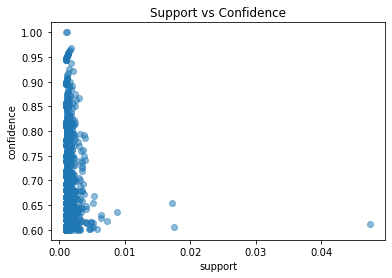

In [ ]:
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

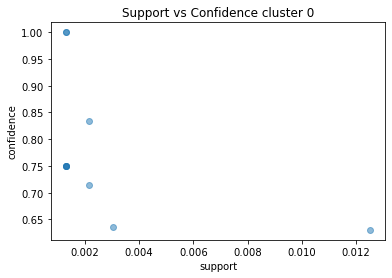

In [ ]:
plt.scatter(clust_rules[0]['support'], clust_rules[0]['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence cluster 0')
plt.show()

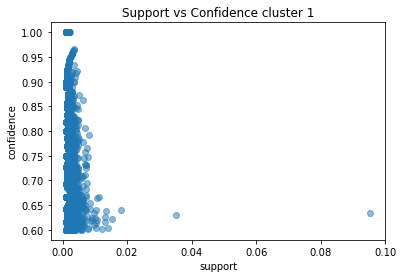

In [ ]:
plt.scatter(clust_rules[1]['support'], clust_rules[1]['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence cluster 1')
plt.show()

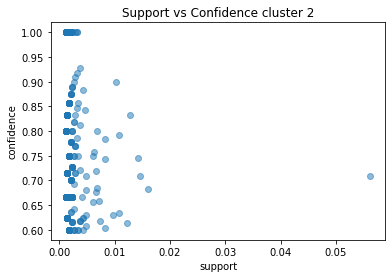

In [ ]:
plt.scatter(clust_rules[2]['support'], clust_rules[2]['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence cluster 2')
plt.show()

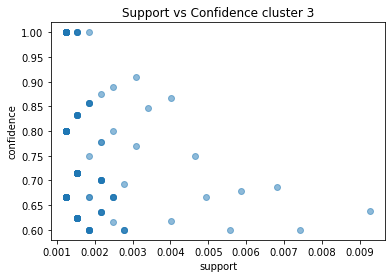

In [ ]:
plt.scatter(clust_rules[3]['support'], clust_rules[3]['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence cluster 3')
plt.show()

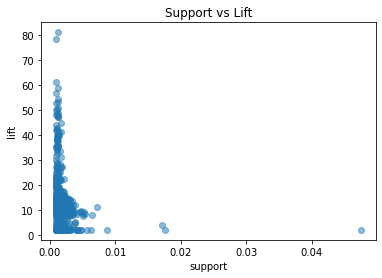

In [ ]:
plt.scatter(rules['support'], rules['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

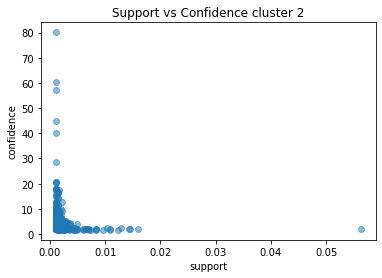

In [ ]:
plt.scatter(clust_rules[2]['support'], clust_rules[2]['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence cluster 2')
plt.show()

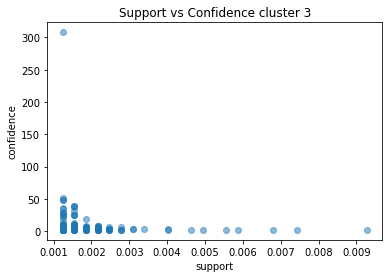

In [ ]:
plt.scatter(clust_rules[3]['support'], clust_rules[3]['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence cluster 3')
plt.show()

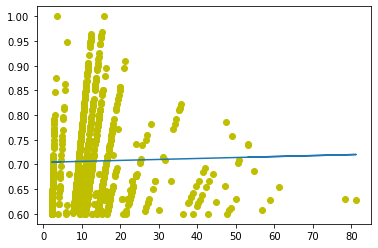

In [ ]:
fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules['lift'], rules['confidence'], 'yo', rules['lift'], 
fit_fn(rules['lift']))

In [ ]:
files=['clust0','clust1','clust2','clust3']
for i in range (0,4):
    clust_rules[i].to_csv('{0}_.csv'.format(files[i]), encoding='ANSI', index=False, sep=';')
    clust_rules[i].to_csv('{0}.csv'.format(files[i]), encoding='utf-8', index=False, sep=';')

In [ ]:
rules.to_csv('all.csv', encoding='utf-8', index=False, sep=';')
rules.to_csv('all_.csv', encoding='ANSI', index=False, sep=';')
